In [2]:
import pandas as pd

path = 'C:\\courses\\DataManaging andVis\\Visualization\\project\\archive\\netflix_titles.csv'
df = pd.read_csv(path)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

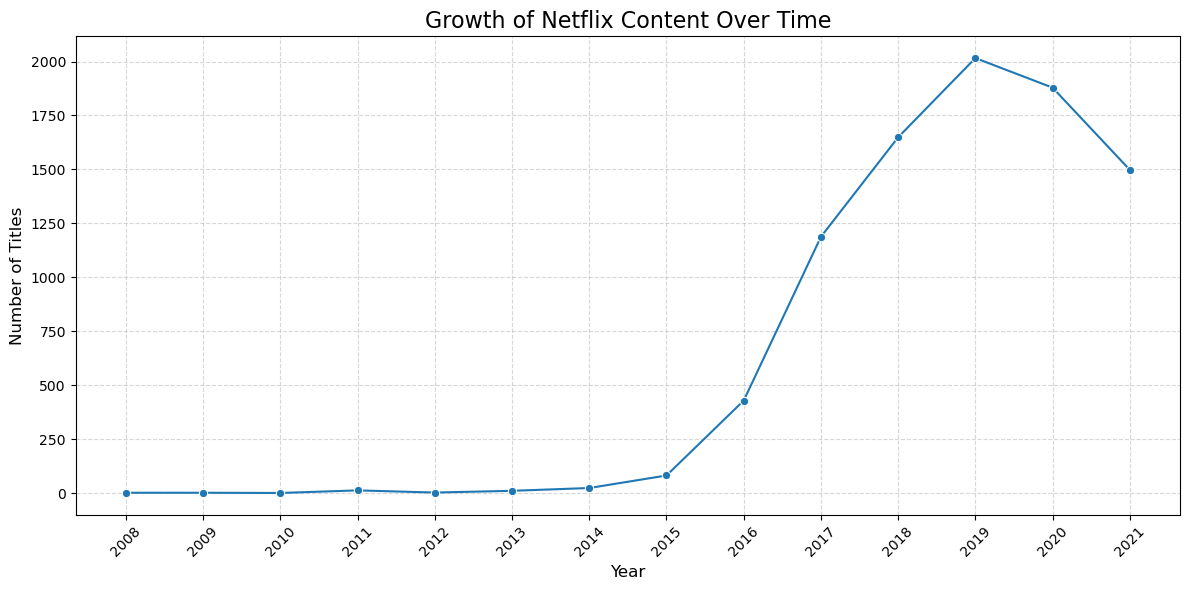

In [5]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
path = 'C:\\courses\\DataManaging andVis\\Visualization\\project\\archive\\netflix_titles.csv'
df = pd.read_csv(path)

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')

# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Handle missing values (optional for this chart)
df['year_added'] = df['year_added'].fillna(0)
df = df[df['year_added'] != 0]  # Remove rows with missing date_added

# Aggregate: count of titles per year
titles_per_year = df.groupby('year_added').size().reset_index(name='count')

# Plotting
plt.figure(figsize=(12,6))
sns.lineplot(data=titles_per_year, x='year_added', y='count', marker='o')
plt.title("Growth of Netflix Content Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.xticks(titles_per_year['year_added'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()


In [6]:
type_counts = df['type'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']

# Save to CSV for Datawrapper
type_counts.to_csv("netflix_type_counts.csv", index=False)

In [7]:
# Replace missing countries with 'Unknown'
df['country'] = df['country'].fillna('Unknown')

# Some titles have multiple countries separated by commas
# Split and explode to count each country separately
df_countries = df.assign(country=df['country'].str.split(',')).explode('country')

# Strip whitespace
df_countries['country'] = df_countries['country'].str.strip()

# Count titles per country
country_counts = df_countries['country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Keep top 10 countries
top_countries = country_counts.head(10)

# Save to CSV for Datawrapper
top_countries.to_csv("netflix_top_countries.csv", index=False)


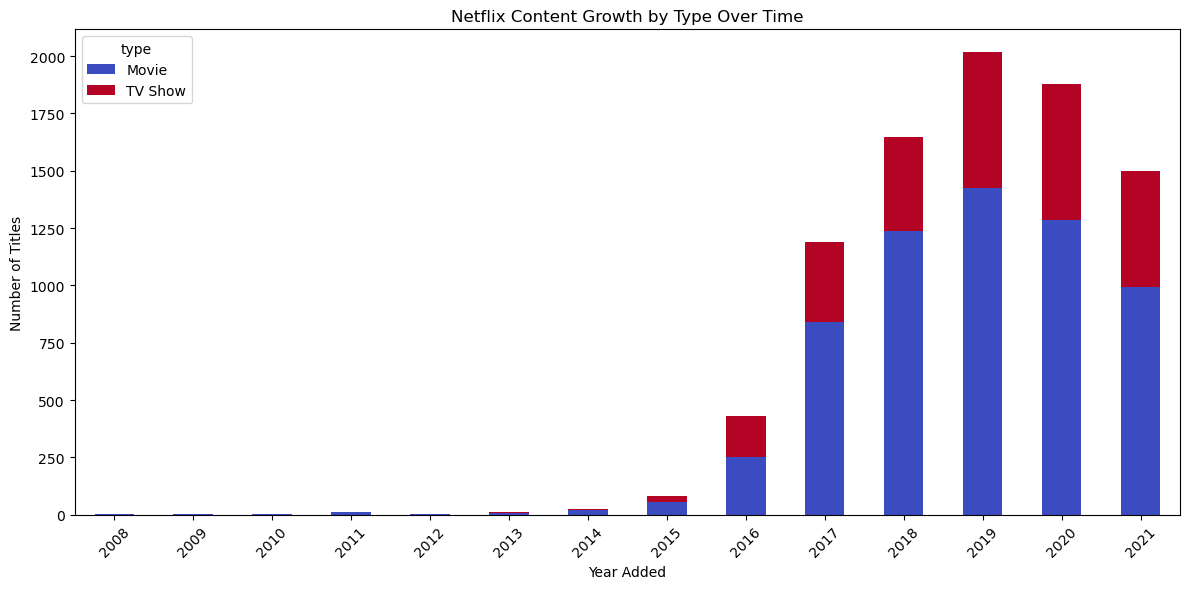

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year

# Drop rows with missing year_added
df = df.dropna(subset=['year_added'])

# Aggregate by year and type
data = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)

# Plot stacked bar chart
data.plot(kind='bar', stacked=True, figsize=(12,6), colormap='coolwarm')
plt.title("Netflix Content Growth by Type Over Time")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
